## Topic:

In business, companies invest significant resources in designing new products, marketing initiatives, and enhancing customer retention efforts. However, allocating budgets to support these efforts without understanding of customer needs and behaviors is akin to a navigator without a compass or a chef without a recipe. Thus, to drive success, enhance competitiveness and stay ahead in the market, companies try to analyze its customers continuously.
Customer personality analysis helps businesses group their customers into meaningful segments to address their unique needs and create personalized marketing campaigns. It also helps identify low-value and high value customers and develop strategies to enhance their satisfaction. 
Multiple teams in the company would be interested in solving this problem such as marketing teams, sales teams, product development teams and finally executive and decision makers who will be guided in their business strategy and resources allocation.


## Data Selection:

The data for this project was sourced from the open data platform Kaggle. The link to the dataset is https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
The dataset encompasses a range of 29 features that provide valuable insights for solving this problem, including customers' demographics and personal traits, shopping experiences, behavioral patterns, and any recorded complaints.

## Objective:

My objective is to segment the customers into meaningful groups, based on some or all the features in the dataset, to help stakeholders take informative decisions for optimizing their marketing strategy.


## Importing Libraries:

In [209]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


## Data loading:

In [210]:
# load data
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\sanas\Desktop\master\DSC630 datasets\marketing_campaign.csv", sep="\t")

In [211]:
# view first few rows of data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [212]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [213]:
# display the shape of data
df.shape

(2240, 29)

In [214]:
# display the columns in the data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Cleaning:

### 1- Check and Handle Missing Data:

In [215]:
# check for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [216]:
# replace the null values in the 'Income' column with the Income mean:
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

### 2- Find and Handle Duplicates:

In [217]:
# check for duplicates
duplicates = df.duplicated().sum()
print("The dataset contains {} duplicates.".format(duplicates))

The dataset contains 0 duplicates.


### 3- Create New column 'Children' instead of 'kidhome' and 'Teenhome' :

In [218]:
# Create one column for 'children' instead of 'Kidhome' and 'Teenhome'
df['Children'] = df['Kidhome'] + df['Teenhome']

In [219]:
# drop the columns 'Kidhome' and 'Teenhome'
df = df.drop (columns = ['Kidhome','Teenhome'], axis=1)

### 5- Replacing Values:

In [220]:
# find the unique values for the column 'Marital_Status'
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [221]:
# Replace the values ('Single', 'Divorced', 'Widow', 'Alone') with the value 'No_Partner' and the values ('Together', 'Married') with the value 'With_Partner'
df['Marital_Status'] = df['Marital_Status'].replace ({'Together': 'With_Partner', 'Married': 'With_Partner', 'Divorced':'No_Partner', 'Widow':'No_Partner', 'Alone':'No_Partner', 'Single':'No_Partner'})

The entries 'YOLO' mostly standing for 'You Only Live Once' and 'Absurd' represent 4 entries. They may be listed in the context of jokes. It is not clear and doesn't make sense. So, I prefer to replace them with the most common entry.

In [222]:
# Replace the values 'Absurd' and 'YOLO' by the mode of that column.

In [223]:
# Calculate the mode of 'Marital_Status' column, excluding invalid values
mode_value = df.loc[~df['Marital_Status'].isin(['YOLO', 'Absurd']), 'Marital_Status'].mode()[0]
# replace 'YOLO' and 'Absurd' with mode value
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': mode_value, 'Absurd':mode_value })


In [224]:
# find unique values of column 'Education':
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [225]:
# replace the value 'Graduation' with 'Graduate', 'PhD' and 'Master' with 'Postgraduate' 
df['Education'] = df['Education'].replace({'Graduation': 'Graduate+', 'PhD': 'Graduate+', 'Master':'Graduate+', '2n Cycle': 'Graduate+'})


In [226]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduate+,No_Partner,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduate+,No_Partner,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduate+,With_Partner,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduate+,With_Partner,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,Graduate+,With_Partner,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [227]:
df.Education.unique()

array(['Graduate+', 'Basic'], dtype=object)

### 6- Convert the column 'Dt_Customer' to datetime format:

In [228]:
# convert the column 'Dt_Customer' to date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

The customers are recorded as customers with the retail company at that date, we may create a feature of 'customer_for' corresponding to the period being customer if we will use it in modeling.

## Data Exploration:

### 1- Descriptive Statistics:

In [21]:
df.describe()

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
count,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446
min,0.000000,1893.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000
std,3246.662198,11.984069,25037.797168,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803


- The average age of customers is 56 years old.
- The mean income of customers is 52247 dollars and the average total spending is nearly 606 dollars.
- 75% of customers are paid 68289 dollars or less. 
- The average recency is about 49 days.

### 2- Data Visualization:

In [22]:
# - Barplot of customers' Marital Status

Text(0.5, 1.0, 'Customers Marital Status')

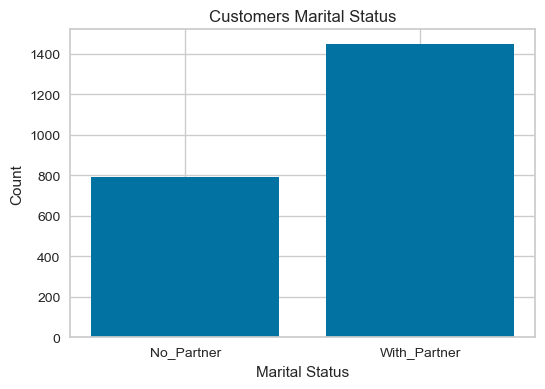

In [23]:
# group by marital status and count
maritalStatus_data = df.groupby('Marital_Status')['Marital_Status'].count()

# create plot
plt.figure(figsize=(6,4))
plt.bar(maritalStatus_data.index, maritalStatus_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Customers Marital Status')

The customers with partner ( married or in couple) are twice that of those without partner.

In [24]:
## - Barplot of customers Education:

Text(0.5, 1.0, 'Distribution of Customers Education Levels')

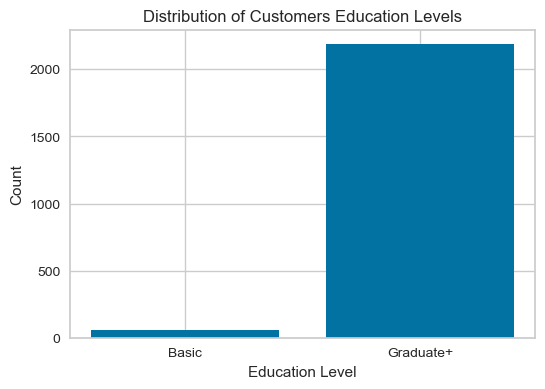

In [25]:
# group by Education and count
Education_data = df.groupby('Education')['Education'].count()

# create plot
plt.figure(figsize=(6, 4))
plt.bar(Education_data.index, Education_data.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Customers Education Levels')

Customers have mostly higher education, while few of them have basic education.

In [26]:

## - A Stacked bar chart revealing spending on various products:

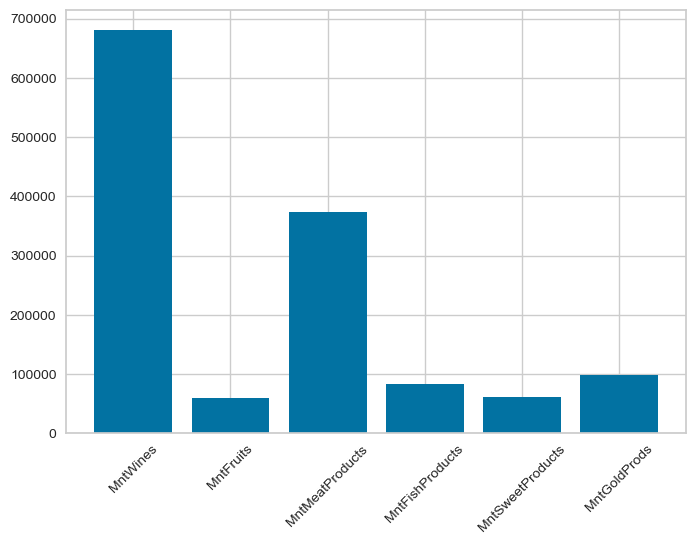

In [27]:
# group by marital status and sum the spending in the columns of product categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df[spending_columns].sum()
plt.bar(spending_data.index, spending_data.values)
plt.xticks(rotation=45)
plt.show()

Customers spend mostly in wines and meat.

In [28]:
## - Correlation matrix on spending columns and purchase channels:

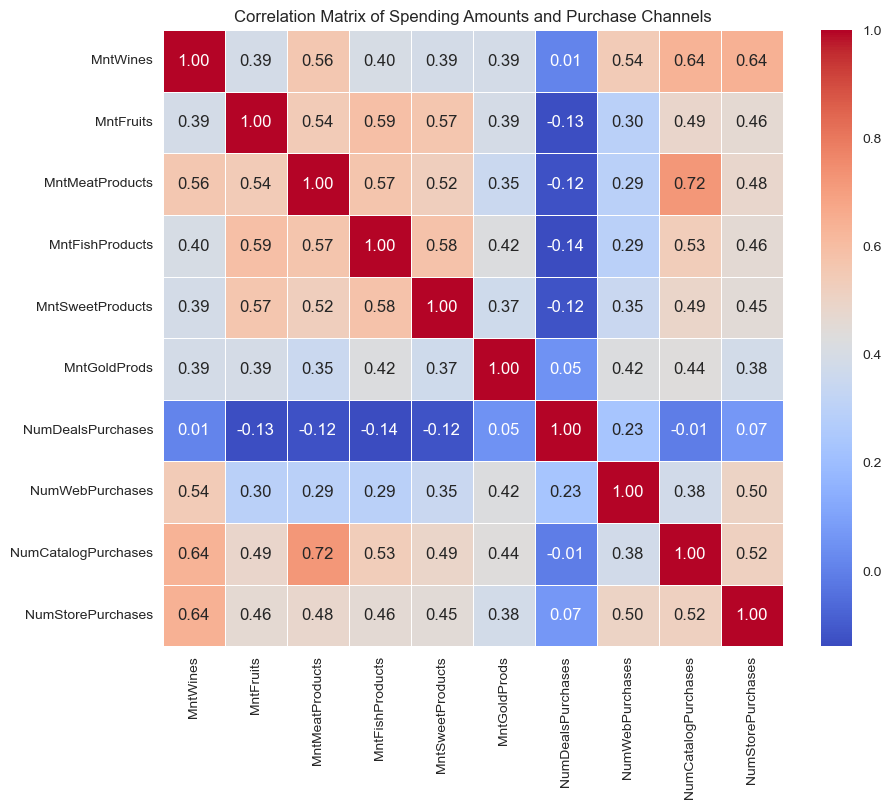

In [29]:
spending_purchaseChannel_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

# create the correlation matrix
corr_matrix = df[spending_purchaseChannel_columns].corr()

# Plotting
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Spending Amounts and Purchase Channels')
plt.show()

There is a very strong and consistent correlation between the number of store purchases and spending amounts in Wine. Additionally, a correlation coefficient of 0.72 between Amounts of Meat Products and number of Catalog purchases indicates a significant correlation between the two variables.

In [30]:
# - A bar plot comparing the number of purchases per Channel:

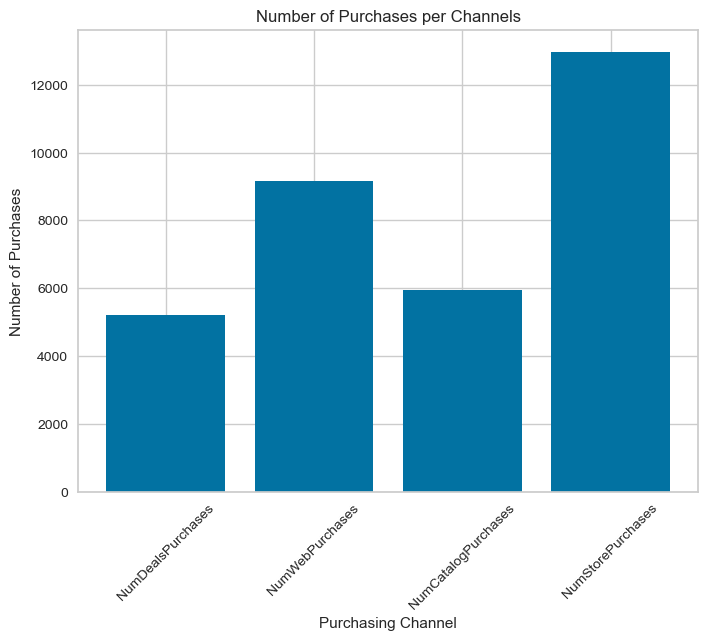

In [31]:
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

# group by marital status and compute the number of purchases in each channel
purchaseChannels_data = df[purchase_channels].sum()

# calculate the total number of purchases per channel
#total_purchaseChannels_data = purchaseChannels_data.sum() 

# create bar plot
plt.figure(figsize=(8,6))
plt.bar(purchaseChannels_data.index, purchaseChannels_data.values)
plt.xlabel("Purchasing Channel")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per Channels")
plt.xticks(rotation=45)
plt.show()



Customers predominantly make purchases in person at the store, followed by online transactions (web purchases), with catalog and deals purchases being the least common.

In [32]:
# - A Bar chart showing acceptance rate per Marketing Campaign. 

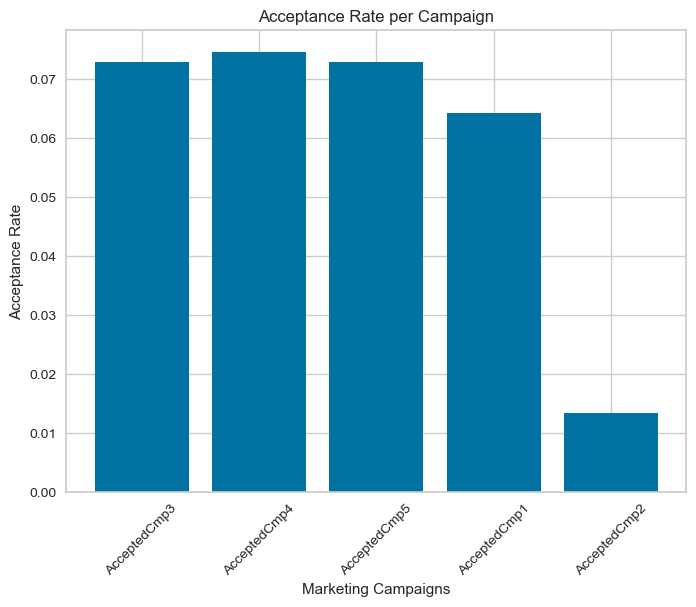

In [33]:
acceptance_channels = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
acceptance_data = df[acceptance_channels].mean()
# create bar plot
plt.figure(figsize=(8,6))
plt.bar(acceptance_data.index, acceptance_data.values)
plt.xlabel("Marketing Campaigns")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate per Campaign")
plt.xticks(rotation=45)
plt.show()

The acceptance rates across different campaigns are relatively similar (more than 6% in average), except for Campaign 2, which has the lowest acceptance rate. 

Overall, stakeholders have to know which categories of people responded to these campaigns, their purchasing channels and their spending behavior, so they can take more precise and tailored decisions. 

In [34]:
# - Pie Chart illustrating the Distribution of complaints:

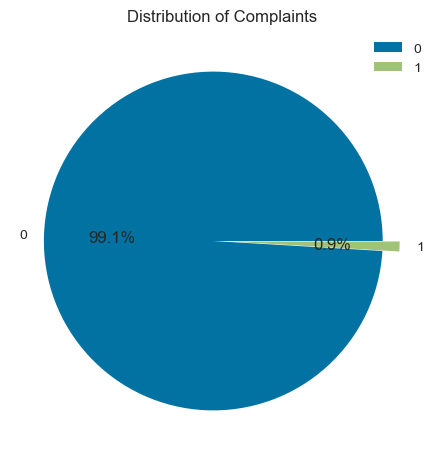

In [35]:
# create pie chart
complaint_data = df['Complain'].value_counts()
plt.pie(complaint_data, labels= complaint_data.index, autopct='%1.1f%%', explode=(0.05,0.05))
plt.title('Distribution of Complaints')
plt.legend()
plt.show()

Only about 1% of customers filed complaints. This might indicate their satisfaction.

## Data preparation for Modeling:

### 1- Deriving new features from existing data.:

In [229]:
# create 'Age' column for customers
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [230]:
# create 'Age_Groups' column
## create the function grouping_age.
def grouping_age(Age):
    if Age <= 35:
        return 'Young'
    else:
        return 'Adult'
    
# apply the function to the column 'Age'
df['Age_Groups'] = df['Age'].apply(grouping_age)  

In [231]:
# create the new column "Total Spending"
df['Total_Spending'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

In [232]:
# create total 'Spending_from_income' feature:
df['Spending_from_income'] = (df['Total_Spending'] / df['Income']) * 100

In [233]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [234]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Age_Groups,Total_Spending,Spending_from_income,Is_Parent
0,5524,1957,Graduate+,No_Partner,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,68,Adult,1617,2.781313,0
1,2174,1954,Graduate+,No_Partner,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,71,Adult,27,0.058260,1
2,4141,1965,Graduate+,With_Partner,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,60,Adult,776,1.083602,0
3,6182,1984,Graduate+,With_Partner,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,41,Adult,53,0.198904,1
4,5324,1981,Graduate+,With_Partner,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,44,Adult,422,0.723929,1


In [235]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Age',
       'Age_Groups', 'Total_Spending', 'Spending_from_income', 'Is_Parent'],
      dtype='object')

In [236]:
df['Average_acceptance'] = df[['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].mean(axis=1)

In [237]:
df['Total_purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum(axis=1)

### 2- Drop any redundant unnecessary columns:

In [238]:
df= df.drop(columns= ['Year_Birth', 'Recency', 'Children', 'Age', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

### 3- Finding outliers and Handling them:

In [239]:
# define numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categrical_features = df.select_dtypes(include=object).columns



In [240]:
numerical_features

Index(['ID', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Total_Spending', 'Spending_from_income', 'Is_Parent',
       'Average_acceptance', 'Total_purchases'],
      dtype='object')

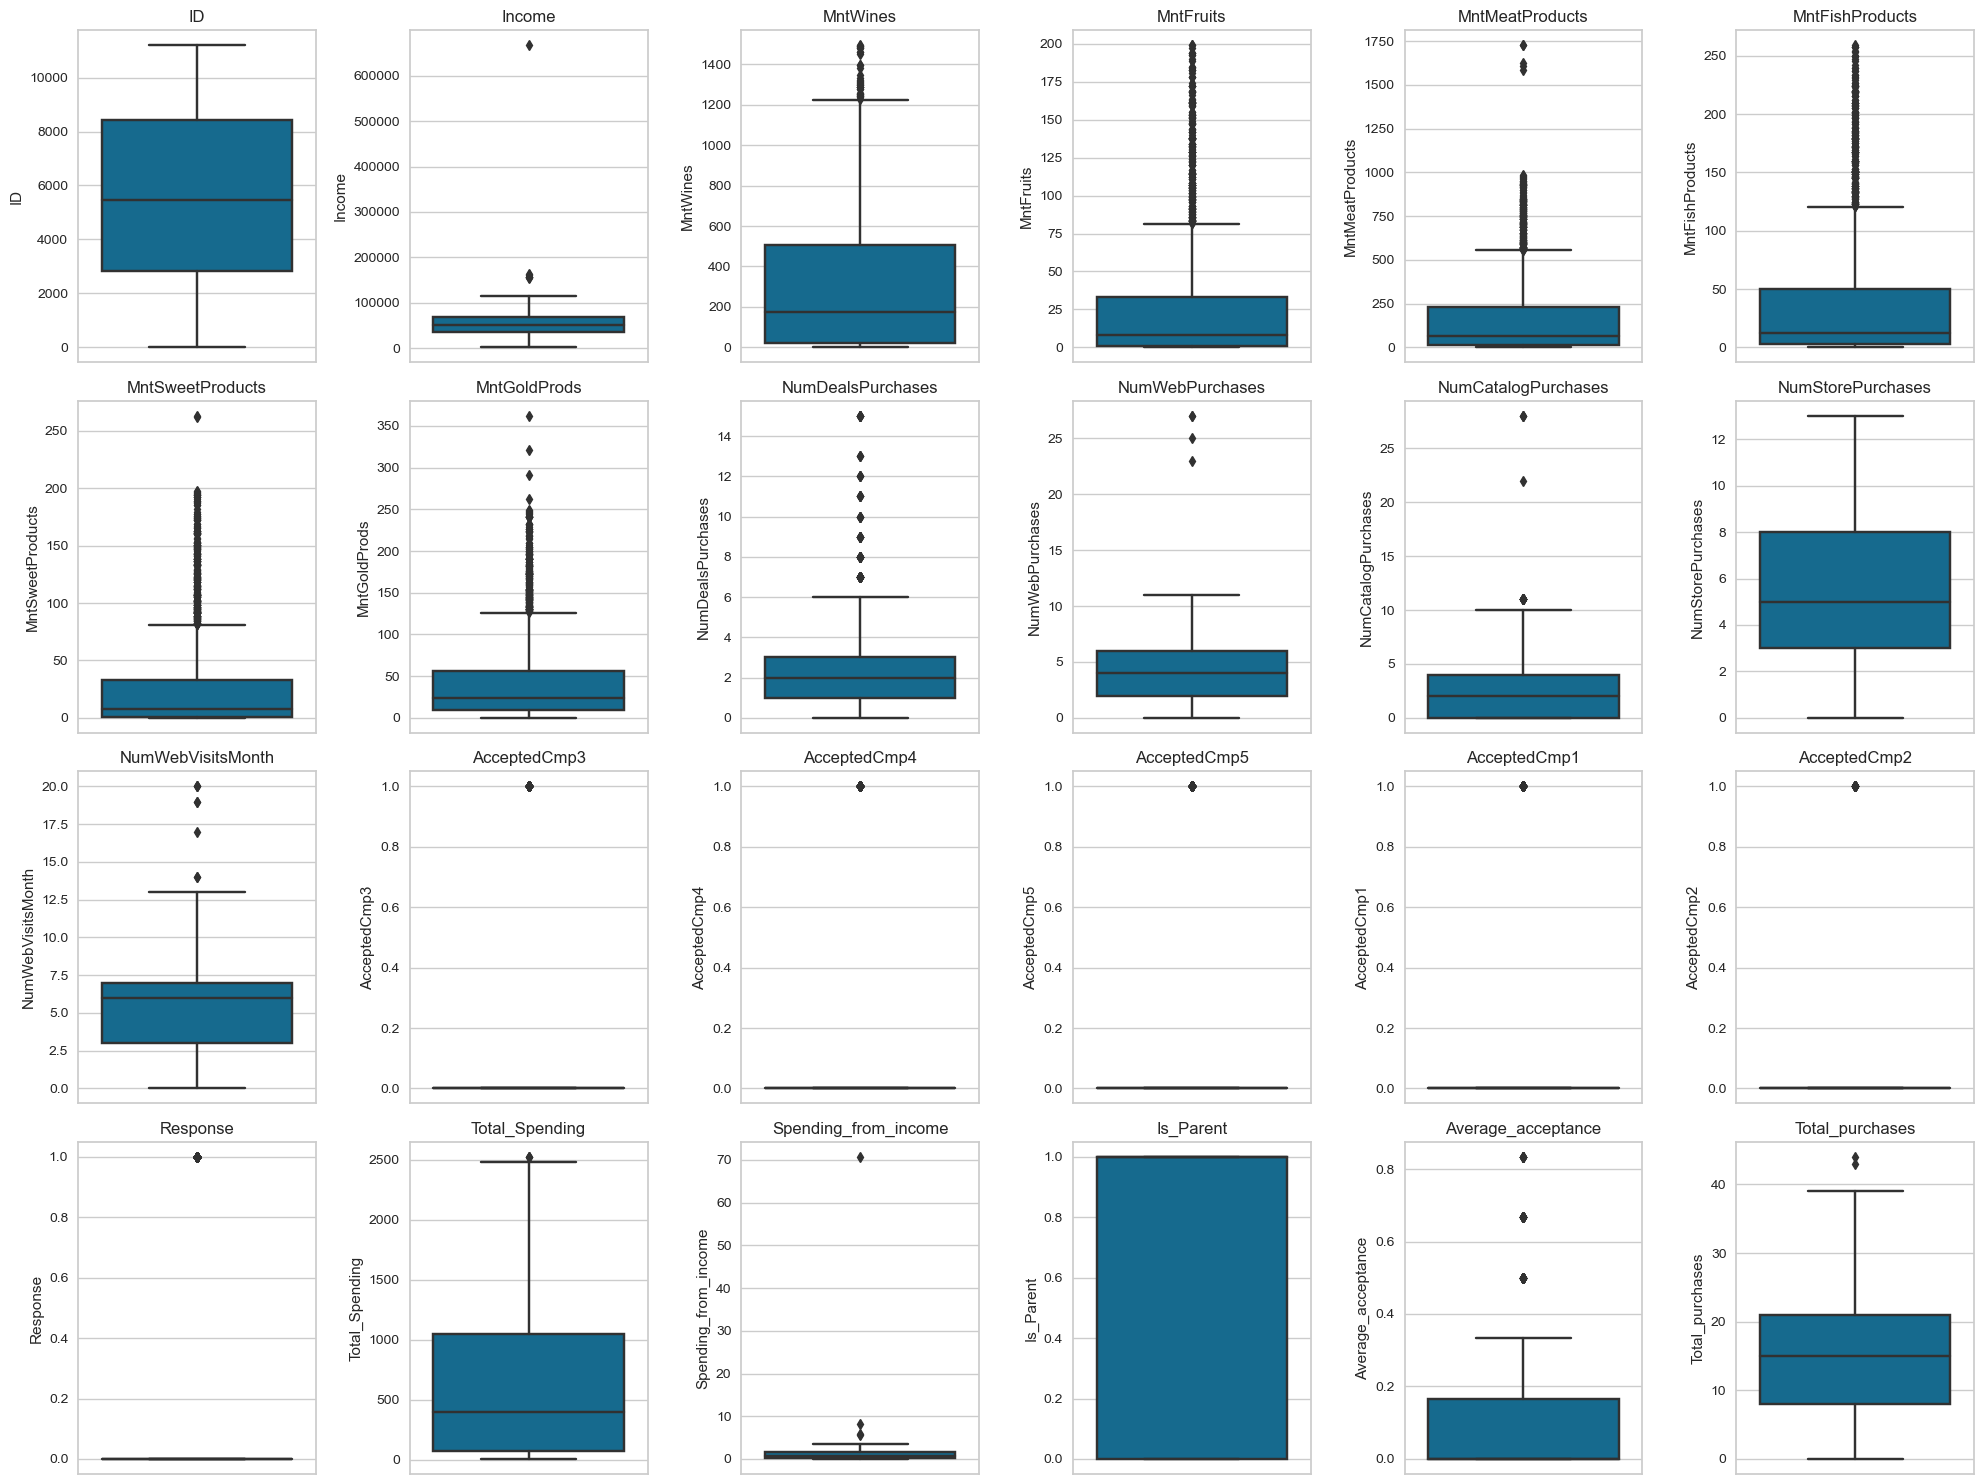

In [241]:
# check for outliers:
# Boxplot Method:
plt.figure(figsize=(20,15)) 
for i, col in enumerate(numerical_features):
    plt.subplot(4, 6, i + 1)  # 4 rows and 6 columns
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

- Income: Values exceeding 600,000 dollars appear unrealistic, given that the average income is below 100,000 dollar.

- Total Spending and Spending from Income: Both variables exhibit pronounced outliers, indicating the presence of a few unusually high spenders.

In [242]:
# Handling outliers:

In [243]:

df[df['Income']>600000]

,ID,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Groups,Total_Spending,Spending_from_income,Is_Parent,Average_acceptance,Total_purchases
2233,9432,Graduate+,With_Partner,666666.0,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,Adult,62,0.0093,1,0.0,11


In [244]:
df[df['Spending_from_income']>10]

,ID,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Groups,Total_Spending,Spending_from_income,Is_Parent,Average_acceptance,Total_purchases
21,5376,Graduate+,With_Partner,2447.0,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,Adult,1730,70.698815,1,0.0,43


This is unrealistic, an income exceeding 600000 dollars witha total spending of 62 dollars during two years. Also, a customer with annual income of 2447 dollars, probably not working, with total spending of 1730 dollars. Probably, these  are errors. Then, I prefer to remove outliers from the columns 'Income' and 'Spending_from_income' to get better modeling results. 

In [245]:
# function to remove outliers using IQR
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to numerical features
df = remove_outliers(df, df[['Income', 'Spending_from_income']])


In [246]:
# reset indexes:
df = df.reset_index(drop=True)
df.head()

,ID,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Groups,Total_Spending,Spending_from_income,Is_Parent,Average_acceptance,Total_purchases
0,5524,Graduate+,No_Partner,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,Adult,1617,2.781313,0,0.166667,25
1,2174,Graduate+,No_Partner,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Adult,27,0.058260,1,0.000000,6
2,4141,Graduate+,With_Partner,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,Adult,776,1.083602,0,0.000000,21
3,6182,Graduate+,With_Partner,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Adult,53,0.198904,1,0.000000,8
4,5324,Graduate+,With_Partner,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Adult,422,0.723929,1,0.000000,19


### 5- Apply Label Encoding to categorical data (Age Groups):

In [ ]:
# columns we will use for clustering
columns_to_use = [
        'Is_Parent',
       'Age_Groups', 'Spending_from_income']

# display the dataframe for these columns 
df[columns_to_use]


In [249]:

df['Age_Groups'] = df["Age_Groups"].map({"Young":0, "Adult":1})

### 6- Data Scaling:

In [251]:
# apply min max scaler to the data
columns_to_scale = ['Spending_from_income']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [252]:
# check the scaling done
df[columns_to_use].head()

,Is_Parent,Age_Groups,Spending_from_income
0,0,1,0.786235
1,1,1,0.010012
2,0,1,0.302292
3,1,1,0.050104
4,1,1,0.199765


## Data Modeling: 

### - Implementing  and Evaluating K_Means model:

Elbow Method to determine the number of clusters to be formed:


C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

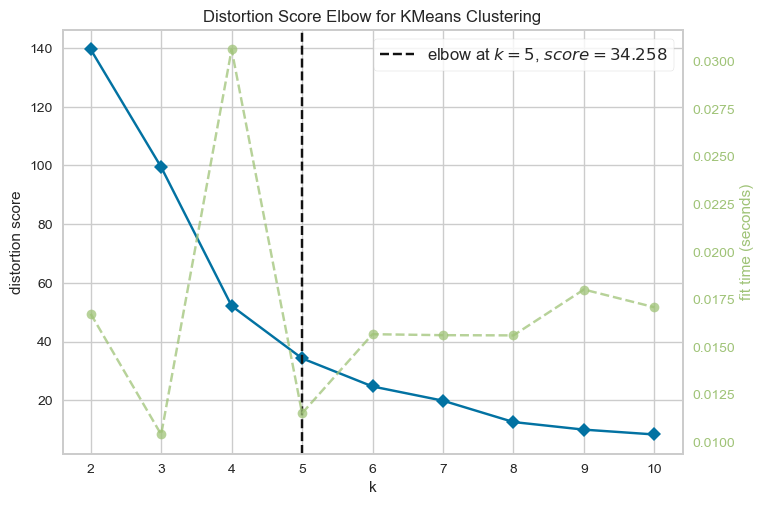

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [253]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, locate_elbow=True, timings=True)
Elbow_M.fit(df[columns_to_use])
Elbow_M.show()

In [254]:
# Final K_Means Model
kmeans = KMeans(n_clusters = 5, random_state=42, n_init = 10)
df['Cluster'] = kmeans.fit_predict(df[columns_to_use])

C:\Users\sanas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [255]:
print(df['Cluster'].unique())

cluster_counts = df['Cluster'].value_counts()
cluster_counts
 

[2 1 4 3 0]


Cluster
1    1076
3     508
2     390
4     193
0      61
Name: count, dtype: int64

In [256]:
# get value counts as percentages
cluster_percent = df['Cluster'].value_counts(normalize=True) * 100
cluster_percent = cluster_percent.round(0).astype(int)
cluster_percent

Cluster
1    48
3    23
2    18
4     9
0     3
Name: proportion, dtype: int32

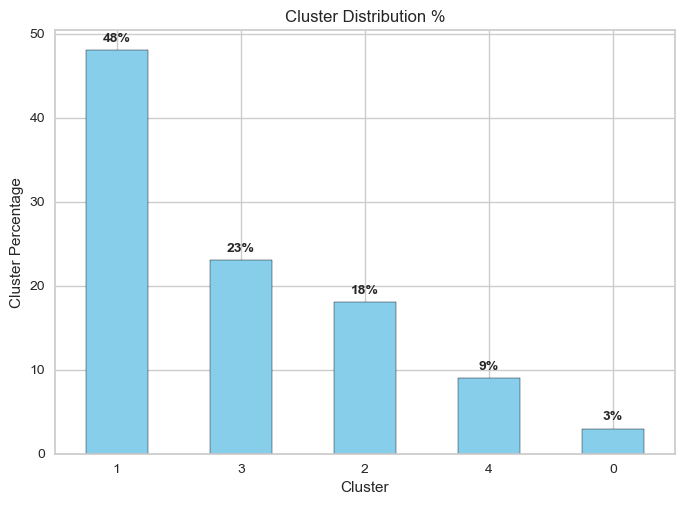

In [257]:
# visualize clusters percentages
ax = cluster_percent.plot(kind='bar', color='skyblue', edgecolor='black')

for i, v in enumerate(cluster_percent):
    ax.text(i, v + 1, f"{v}%", ha='center', fontsize=10, fontweight='bold')
plt.title("Cluster Distribution %")
plt.xlabel("Cluster")
plt.ylabel("Cluster Percentage")
plt.xticks(rotation=0)
plt.show()

In [258]:
df2 = df[['Is_Parent',
       'Age_Groups', 'Spending_from_income', 'Cluster']]

In [259]:
# Evaluate the model
silhouette_avg = silhouette_score(df2.drop(columns=['Cluster']), df2['Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg:.4f}')

Silhouette Score for K-Means: 0.6482


The silhouette score is for the K_Means model is about to 0.65. That means that the model is performing good with clear structure of clusters formed. 

## K-Means Clusters Interpretation and Recommendations:

In [260]:
# create a summary of the clusters
df2_analysis = df2.copy()
df2_analysis['Cluster'] = df2['Cluster']

# Compute mean values for each cluster
cluster_summary = df2_analysis.groupby('Cluster').mean()
print(cluster_summary)


         Is_Parent  Age_Groups  Spending_from_income
Cluster                                             
0         0.180328         0.0              0.346082
1         1.000000         1.0              0.089824
2         0.000000         1.0              0.560605
3         1.000000         1.0              0.429801
4         0.000000         1.0              0.188481


Text(0.5, 1.0, 'Spending per Cluster')

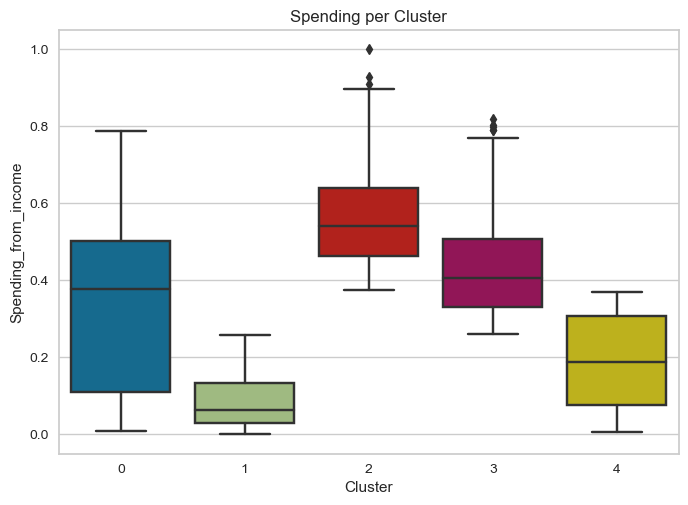

In [261]:
# Boxplots of Clusters according to their spending behavior

sns.boxplot(data= df2_analysis, y= 'Spending_from_income', x= 'Cluster')
plt.title("Spending per Cluster")


Let's explore more these clusters.

In [200]:
df.head()

,ID,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Groups,Total_Spending,Spending_from_income,Is_Parent,Average_acceptance,Total_purchases,Cluster
0,5524,Graduate+,No_Partner,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,1,1617,0.786235,0,0.166667,25,2
1,2174,Graduate+,No_Partner,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,1,27,0.010012,1,0.000000,6,1
2,4141,Graduate+,With_Partner,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,1,776,0.302292,0,0.000000,21,4
3,6182,Graduate+,With_Partner,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,1,53,0.050104,1,0.000000,8,1
4,5324,Graduate+,With_Partner,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,422,0.199765,1,0.000000,19,1


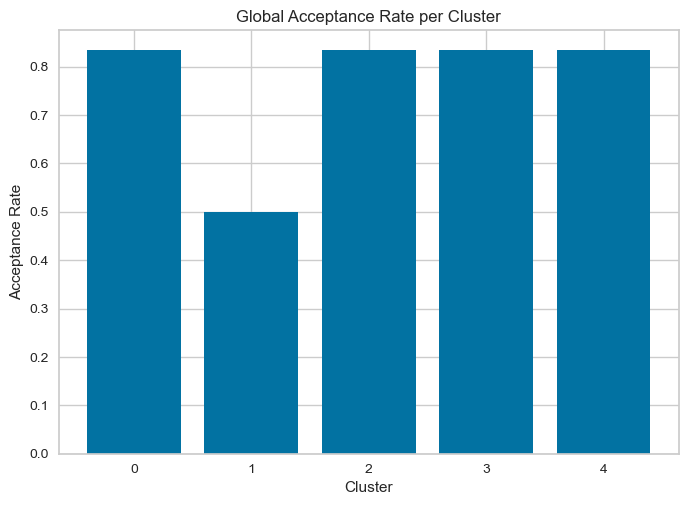

In [202]:
# Average of campaigns acceptance rate for each cluster: 
plt.bar(df['Cluster'], df['Average_acceptance'])
plt.xlabel("Cluster")
plt.ylabel("Acceptance Rate")
plt.title("Global Acceptance Rate per Cluster")
plt.show()

Text(0.5, 1.0, 'Cluster wise Spendings')

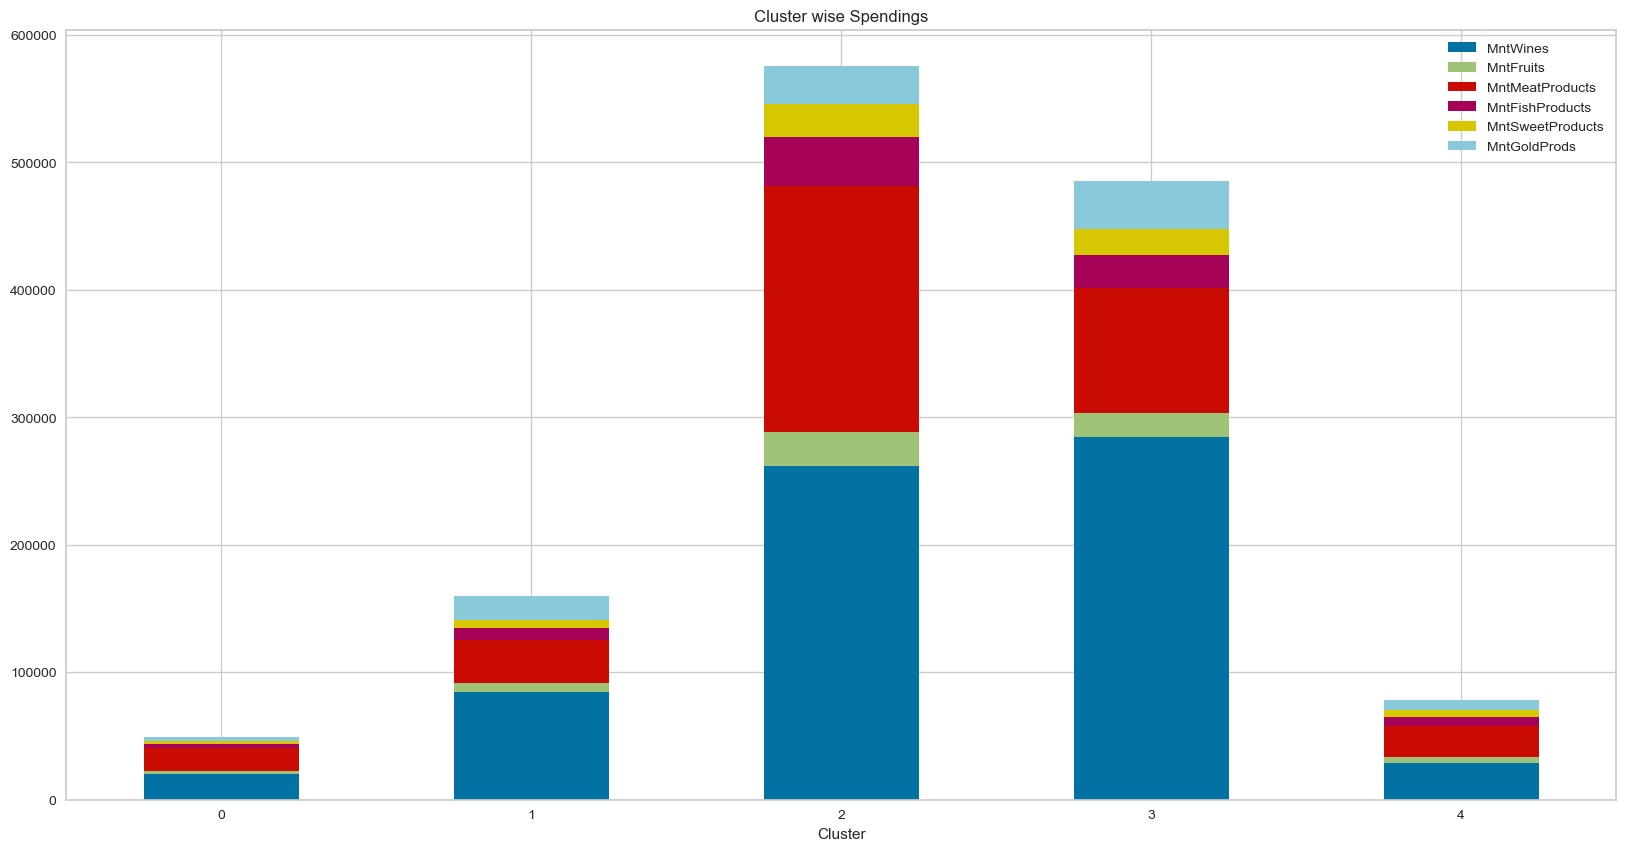

In [208]:
cluster_spendings = df.groupby('Cluster')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True,figsize=(20,10))
plt.xticks(rotation=0)
plt.title('Cluster wise Spendings')

Text(0.5, 1.0, 'Cluster wise Purchasing habits')

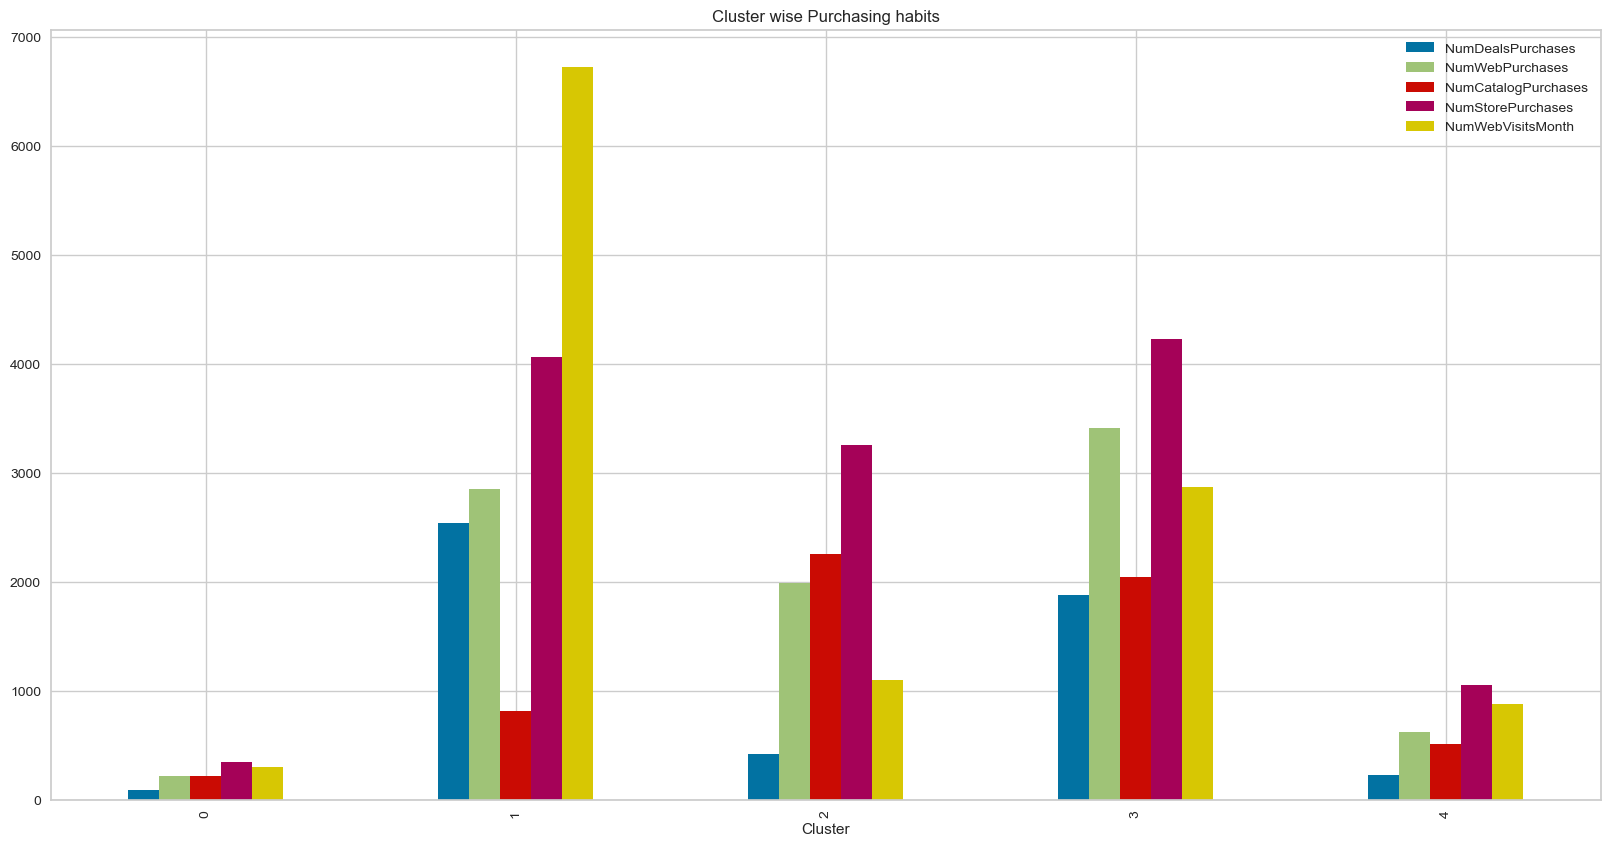

In [205]:
cluster_purchases = df.groupby('Cluster')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0)
plt.title('Cluster Purchasing habits')

All the clusters spend more in wines and meat. We notice that the purchasing behavior is lined with every cluster count or percentage.

<Axes: xlabel='Cluster', ylabel='Income'>

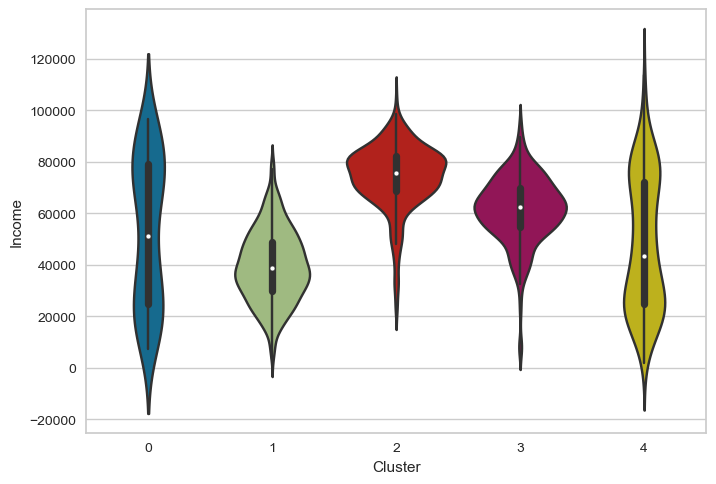

In [207]:
sns.violinplot(data=df, y= 'Income', x= 'Cluster')

- Cluster 0 has the widest spread, including some very low and very high incomes.
- Cluster 1 is centered around lower incomes (~30K–50K).
- Clusters 2 and 3 concentrate around higher mid-level incomes (~60K–80K).
- Cluster 4 is diverse, spanning from low to high incomes, but with a concentration near 70K.

👉 Key takeaway: Cluster 1 represents a low-income, low-acceptance group, while the other clusters generally show higher incomes and higher acceptance rates.


In [396]:
## Recommendations:

The modeling technique used led to 5 clusters, which can help stakeholders to optimize marketing technique.

### Cluster 0: 

#### Profile: Mostly young non-parents with moderate spending (~34.6% of income).

Recommendation: 👉 Offer lower-cost but stylish, attractive products (like entry-level or lifestyle-focused items) to appeal to diverse income levels. Highlight wines and meat, which align with their spending habits, using trendy bundles or promotions. Use digital channels (social media, influencers) to connect with the younger segment.


### Cluster 1

#### Profile: Exclusively adult parents with very low spending (~8.9% of income).

Recommendation: 👉 Provide value-oriented promotions, discounts, and family bundles featuring meat and wine, as this group is highly budget-conscious yet spends more in these categories. De-emphasize premium items like gold, fish, or fruits.


### Cluster 2

#### Profile: Adult non-parents with high spending (~56% of income).

Recommendation: 👉 Target with premium wine and meat packages, subscriptions, and loyalty programs. Emphasize exclusivity, quality, and convenience, while avoiding less popular categories (gold, fish, fruits). Personalized recommendations will resonate strongly here.


### Cluster 3

#### Profile: Adult parents with moderate-to-high spending (~43% of income).

Recommendation:👉 Promote mid-to-premium family-oriented products such as meat packs and wine bundles for home dining. Campaigns around family wellness or celebrations will fit well, while minimizing focus on gold, fish, and fruits.


### Cluster 4

#### Profile: Adult non-parents with low spending (~18.8% of income).

Recommendation: 👉 Encourage engagement through affordable luxury, add-on services, or loyalty points. Position wine and meat as accessible lifestyle luxuries at reasonable costs. Downplay categories with low spending (gold, fish, fruits) to keep offers relevant.


✅ Overall Insight:

Adult non-parents (Clusters 2 & 4) show divergent spending behaviors (high vs. low), requiring differentiated strategies: premium positioning for high spenders, value propositions for low spenders.

Adult parents (Clusters 1 & 3) are generally cautious spenders but differ in disposable income; campaigns should emphasize practicality, trust, and family value.

Young non-parents (Cluster 0) are moderate spenders and should be engaged through digital-first, trend-oriented strategies.

